Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.4794 - acc: 0.8256
Epoch 2/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3591 - acc: 0.8675
Epoch 3/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3243 - acc: 0.8793
Epoch 4/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2996 - acc: 0.8883
Epoch 5/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2813 - acc: 0.8946
Epoch 6/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2689 - acc: 0.8983
Epoch 7/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2565 - acc: 0.9039
Epoch 8/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2460 - acc: 0.9072
Epoch 9/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2333 - acc: 0.9116
Epoch 10/10
60000/60000 [==================

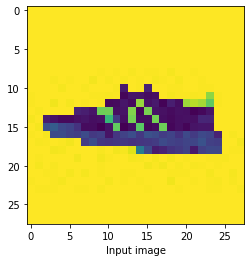

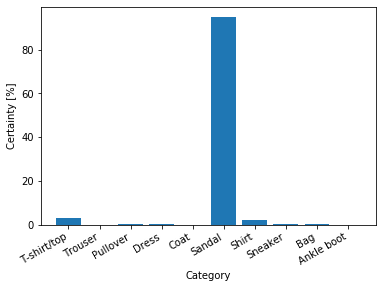

In [70]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocessing 
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the model
# Setting up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(train_images, train_labels, epochs=10)

# Evaluating accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Use an image that was earlier uploaded to CoLab. Image MUST be 28x28
import cv2
#img_path = "Schoen.jpg"                                       # Path to test image (must be uploaded first) 
img_path = "Sandaal.jpg"
test_img = cv2.imread( img_path )                             # Open test image
from skimage import color
test_img = color.rgb2gray(test_img)                           # Convert to grayscale
test_img = test_img / 255.0                                   # Normalize image

prediction = model.predict(np.expand_dims(test_img, axis=0), batch_size=1)  # Perform the prediction but add a dimension to the image as the networks requires an ID for each entry
#print(prediction)                     # Print the likeliness of each category

class_id = np.argmax(prediction[0])
certainty = prediction[0][class_id] * 100
print("The image is guessed to be a", class_names[ class_id ], "with a certainty of", round(certainty, 2), "%")

plt.imshow( test_img )
plt.xlabel("Input image")
plt.yticks(ticks=None, labels=None)
plt.xticks(ticks=None, labels=None)
plt.show()


plt.xlabel("Category")
plt.ylabel("Certainty [%]")

x = np.arange(10)

plt.bar(x, prediction[0] * 100)
plt.xticks(x, class_names)
plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='medium')
plt.show()






